In [366]:
#Preprocesamiento
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from seaborn import load_dataset 

#Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

#Clasificadores y métricas de rendimiento
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [367]:
penguins = load_dataset ("penguins") 
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [368]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [369]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [370]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Quitamos filas con valores nulos

In [371]:
penguins = penguins[penguins["sex"].notna()]

In [372]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Realizamos algunos gráficos para visualizar los datos.

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

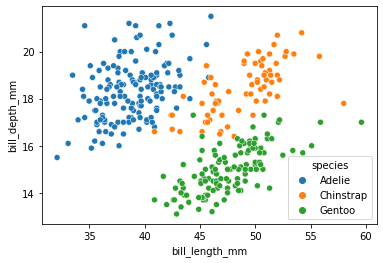

In [373]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

La distribución de los datos de la data de los pinguinos está muy extendida, lo que es muy útil para realizar el Modelo de Machine Learning.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

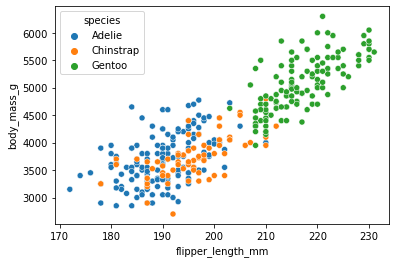

In [374]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species")


Utilizamos las gráficas de violin ya que son una gran herramienta para representar distribuciones de datos numéricos. Aquí, usaremos gráficos de violín para comparar las distribuciones de variables en condiciones benignas y malignas.

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

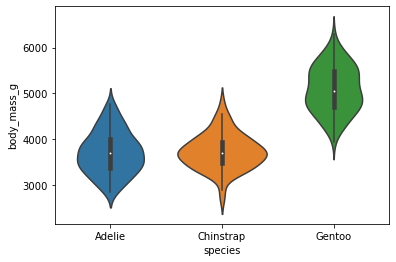

In [375]:
sns.violinplot(data=penguins, x="species", y="body_mass_g")

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

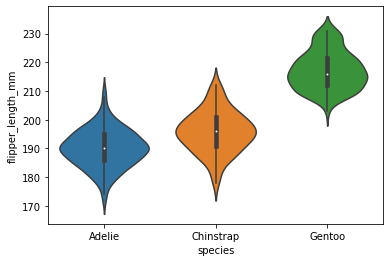

In [376]:
sns.violinplot(data=penguins, x="species", y="flipper_length_mm")

El peso de la masa corporal y la longitud de la aleta de Adelie y Chinstrap, son muy similares. Esto nos llevará a un peor resultado de un modelo de aprendizaje automático. Por lo que  no usaremos estos datos

In [377]:
penguins.groupby("species")["island"].value_counts()

species    island   
Adelie     Dream         55
           Torgersen     47
           Biscoe        44
Chinstrap  Dream         68
Gentoo     Biscoe       119
Name: island, dtype: int64

In [378]:
def code_island(row):
    if row == "Dream":
        return 0
    elif row == "Torgersen":
        return 1
    else:
        return 2

In [379]:
penguins["code_island"] = penguins["island"].apply(code_island)

In [380]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'code_island'],
      dtype='object')

In [381]:
penguins[["island", "code_island"]]

,island,code_island
0,Torgersen,1
1,Torgersen,1
2,Torgersen,1
4,Torgersen,1
5,Torgersen,1
...,...,...
338,Biscoe,2
340,Biscoe,2
341,Biscoe,2
342,Biscoe,2


## KNN MODEL

In [415]:
X = penguins[["code_island",'bill_length_mm', 'bill_depth_mm']]
y = penguins["species"]

In [416]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.4, random_state=22)

In [417]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(199, 3)
(199,)
(134, 3)
(134,)


In [418]:
knn = KNeighborsClassifier(n_neighbors=3)

In [419]:
knn.fit(X_train.values,y_train)

KNeighborsClassifier(n_neighbors=3)

In [420]:
y_pred = knn.predict(X_test.values)

In [424]:
print(round(metrics.accuracy_score(y_test, y_pred),4))

0.9701


Para optimizar mi modelo y encontrar la mejor K para mi modelo. Utilizo la validación cruzada con un bucle for.

In [425]:
k_scores = []
for k in range(1, 35):
    knn = KNeighborsClassifier(n_neighbors=k)
    outcome = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    k_scores.append(outcome.mean())

In [426]:
m = max(k_scores)
i = k_scores.index(m)
print(f"The max score is {m} with a k of {i-1}")

The max score is 0.9878787878787879 with a k of 4


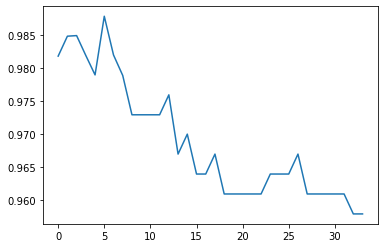

In [427]:
plt.plot(k_scores)

Mi k será 4. Porque eso parece lo mejor para mi modelo de aprendizaje automático.

### CONJUNTO DE DATOS DIVIDIDO

Dividimos el conjunto de datos en entrenamiento (75%) y pruebas (25%)

In [430]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

In [431]:
# Escalamos los datos para que estén dentro de un cierto rango
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # método de ajuste: aprende sobre los datos, transform: usa (x-mean)/sd para transformar los datos en un rango de varianza 1 de media cero
X_test = sc.transform(X_test) # use la media y la desviación estándar obtenidas en el paso anterior

In [432]:
# Construimos un clasificador de regresión logística
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [433]:
Y_predictions = classifier.predict(X_test)

In [434]:
Y_predictions

array(['Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie'

## LOGISTIC REGRESSION

[[38  0  0]
 [ 0 19  0]
 [ 0  0 27]]
1.0 %


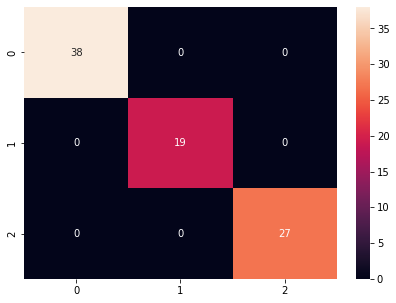

In [435]:
# Realizamos la matriz de confusión y calculamos la puntuación de precisión

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)


mylist = []
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(Y_test, y_pred)

plt.figure(figsize=(7,5))
cm = confusion_matrix(Y_test, Y_predictions)
sns.heatmap(cm, annot=True)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg,'%')

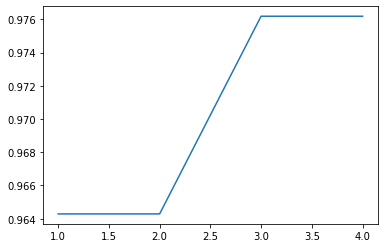

In [436]:
# Encontramos el número óptimo de vecinos

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(Y_test,y_pred))
plt.plot(list(range(1,5)), list1)
plt.show()

Realizamos el entrenamiento del clasificador K del vecino más cercano en el conjunto de entrenamiento

In [437]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

# Predicting the Test set results

y_pred = classifier.predict(X_test)
print(y_pred)

['Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie'
 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap'
 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie']


In [438]:
# Realizamos la matriz de confusión y calculamos la puntuación de precisión
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
acc_knn = accuracy_score(Y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)

[[38  0  0]
 [ 2 17  0]
 [ 0  0 27]]
0.9761904761904762


## RANDOM FOREST CLASSIFCATION

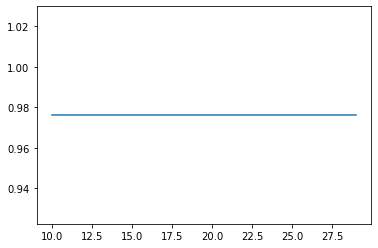

In [439]:
# Encontramos el número óptimo de n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(Y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [440]:
#Entrenamiento del clasificador RandomForest en el conjunto de entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [441]:
# Predicción de los resultados del conjunto de pruebas
y_pred = classifier.predict(X_test)
print(y_pred)

['Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie'
 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap'
 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie']


In [442]:
# Hacemos la matriz de confusión y calculamos la puntuación de precisión
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
acc_randomforest = accuracy_score(Y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

[[38  0  0]
 [ 2 17  0]
 [ 0  0 27]]
0.9761904761904762
